# Лабораторная работа №1
* Создание реляционной базы данных.
* Создание запросов к реляционной базе данных.
* Cоздание индексов к реляционной базе данных.
* Сбор статистики.
* Анализ производительности запросов и индексов с применением встроенных функций СУБД.

## Структура базы данных для расписания университета

1. schedule_user

    id (bigint) — PRIMARY KEY, NOT NULL,(seq: Schedule_User_id_seq)  
    username (character varying) — NOT NULL  
    password (character varying) — NOT NULL  
    role (character varying) — NOT NULL  
    last_login (timestamp with time zone) — DEFAULT NOW()  

2. student_group

    id (bigint) — PRIMARY KEY, NOT NULL  
    name (character varying) — NOT NULL  

3. student

    student_id (bigint) — PRIMARY KEY, NOT NULL  
    name (character varying) — NOT NULL  
    student_group (bigint) — FOREIGN KEY (student_group.id), NOT NULL  
    Schedule_User (bigint) — FOREIGN KEY (schedule_user.id), NOT NULL  

4. teacher

    teacher_id (bigint) — PRIMARY KEY, NOT NULL  
    name (character varying) — NOT NULL  
    degree (character varying) — NOT NULL  
    Teacher_id (bigint) — FOREIGN KEY (schedule_user.id), NOT NULL  

5. subject

    code (character varying) — PRIMARY KEY, NOT NULL  
    name (text) — NOT NULL  

6. study

    subject_code (character varying) — FOREIGN KEY (subject.code), NOT NULL  
    student_group_id (bigint) — FOREIGN KEY (student_group.id), NOT NULL  
    id (bigserial)  

7. taught

    subject_code (character varying) — FOREIGN KEY (subject.code), NOT NULL  
    teacher_id (bigint) — FOREIGN KEY (teacher.teacher_id), NOT NULL  
    id (bigserial)  

8. pair

    number (bigint) — PRIMARY KEY, NOT NULL  

9. room

    id (bigint) — PRIMARY KEY, NOT NULL  
    name (character varying) — NOT NULL  

10. cell

    day (bigint) — NOT NULL
    student_group_id (bigint) — FOREIGN KEY (student_group.id), NOT NULL  
    subject_code (character varying) — FOREIGN KEY (subject.code), NOT NULL  
    room (bigint) — FOREIGN KEY (room.id), NOT NULL  
    pair (bigint) — FOREIGN KEY (pair.number), NOT NULL  
    teacher_pk (bigint) — FOREIGN KEY (teacher.teacher_id), NOT NULL  
    event (text) — может быть NULL  
    id (bigint) — PRIMARY KEY, NOT NULL, автоматически увеличивается (seq: cell_id_seq)  

11. Процедуры

    change_event — обновляет событие для ячейки расписания  
    data_update — обновляет данные расписания (предмет, преподаватель, комната)  
    add_cell — добавляет ячейку в расписание  
    delete_cell — удаляет ячейку из расписания  
    add_teacher — добавляет нового преподавателя в систему  

Ссылка на полный скрипт создания базы данных:  
https://github.com/GodOfPasta/Authorization-Schedule/blob/master/Schedule_init.sql

## Создание запросов и индексов

Для анализа создадим запрос, который выведет на экран расписание указанной группы

```
SELECT
    cell.day AS "День недели",
    pair.number AS "Номер пары",
    subject.name AS "Предмет",
    room.name AS "Аудитория",
    teacher.name AS "Преподаватель",
    cell.event AS "Тип занятия"
FROM
    cell
JOIN
    student_group ON cell.student_group_id = student_group.id
JOIN
    subject ON cell.subject_code = subject.code
JOIN
    room ON cell.room = room.id
JOIN
    teacher ON cell.teacher_pk = teacher.teacher_id
JOIN
    pair ON cell.pair = pair.number
WHERE
    student_group.name = '2321-ДБ' AND cell.day = 1
ORDER BY
    pair.number;
```

Также создадим индексы. Индекс — объект базы данных, создаваемый с целью повышения производительности поиска данных. Таблицы в базе данных могут иметь большое количество строк, которые хранятся в произвольном порядке, и их поиск по заданному критерию путём последовательного просмотра таблицы строка за строкой может занимать много времени. Индекс формируется из значений одного или нескольких столбцов таблицы и указателей на соответствующие строки таблицы и, таким образом, позволяет искать строки, удовлетворяющие критерию поиска. Ускорение работы с использованием индексов достигается в первую очередь за счёт того, что индекс имеет структуру, оптимизированную под поиск — например, сбалансированного дерева.

```
CREATE INDEX idx_cell_day ON public.cell(day);
CREATE INDEX idx_cell_student_group_id ON public.cell(student_group_id);
CREATE INDEX idx_cell_subject_code ON public.cell(subject_code);
CREATE INDEX idx_cell_room ON public.cell(room);
CREATE INDEX idx_cell_pair ON public.cell(pair);
CREATE INDEX idx_cell_teacher_pk ON public.cell(teacher_pk);
CREATE INDEX idx_cell_event ON public.cell(event);
CREATE INDEX idx_cell_composite ON public.cell(day, student_group_id, subject_code, room, pair, teacher_pk, event);

```

## Сбор статистики и анализ производительности

Соберем статистику с помощью функции EXPLAIN ANALYZE. Запустим созданный ранее запрос до создания индексов и просмотрим характеристики его выполнения.


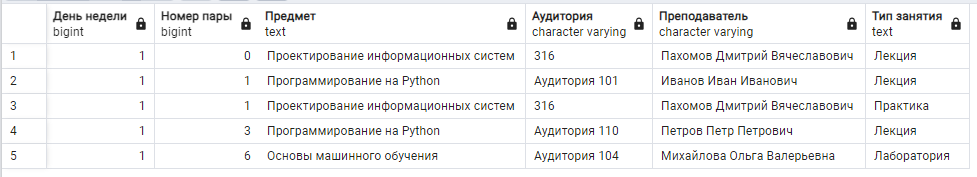

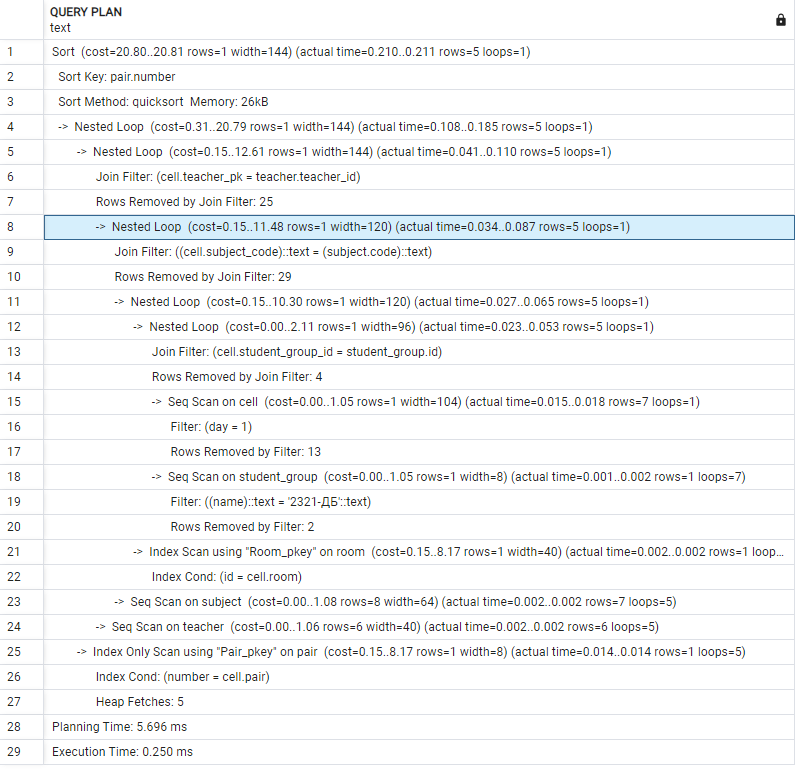

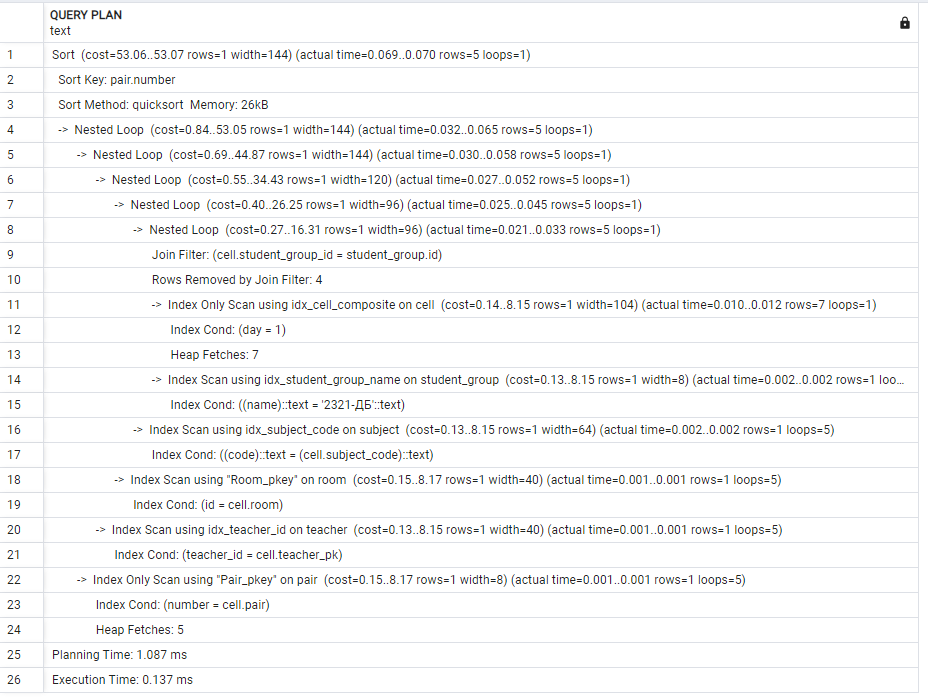

Вывод: Последобавления индексов время выполнения запроса значительно уменьшилось  
Без индексов:  
Planning Time:  5.696 ms  
Execution Time:  0.250 ms  

С индексами:  
Planning Time:  1.087 ms  
Execution Time:  0.137 ms  

Лабораторная работа №2
* Создание распределенной реляционной базы данных.
* Создание запросов к распределенной реляционной базе данных.
* Реализация операций репликации в распределённой реляционной базе данных.
* Реализация нескольких способов фрагментации в распределённой реляционной базе данных.
* Анализ производительности запросов при разных способах фрагментации.